In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# screen cap on roi
cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()

    cv2.imshow('frame1',frame)

    k=cv2.waitKey(10) &0xFF
    if k ==27:
        cv2.imwrite('chicken.jpg',frame)
        break
    
cv2.destroyAllWindows()
cap.release()

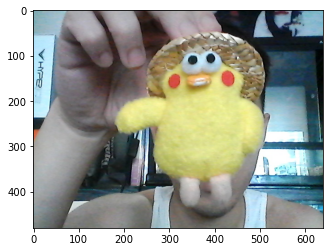

In [2]:
chicken=cv2.imread('chicken.jpg')
chicken=cv2.cvtColor(chicken,cv2.COLOR_BGR2RGB)
plt.imshow(chicken)

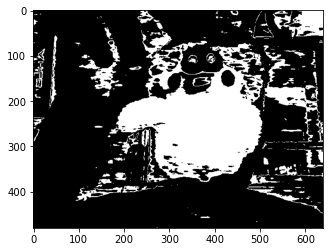

In [27]:
# apply gaussian blur on image to extract the edge more clearly
chicken_g_blur=cv2.GaussianBlur(chicken,(7,7),0.8)

# convert image to hsv color format
h_chicken=cv2.cvtColor(chicken_g_blur,cv2.COLOR_RGB2HSV)

# Anything less than lower limit or greater than upper limit will become zero (black)
chi_mask=cv2.inRange(h_chicken,np.array([0,75,40]),np.array([180,120,255]))

plt.imshow(chi_mask,cmap='gray')

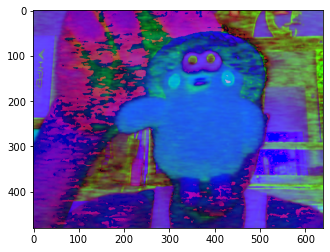

In [68]:
# create a mask that can focus on the doll
hsv_chicken_bit=cv2.bitwise_and(h_chicken,h_chicken,chi_mask)
plt.imshow(hsv_chicken_bit)

In [70]:
#extract ROI or something you want to track
# chicken shape (480,640,3)

hsv_roi=hsv_chicken_bit[50:430,170:500]
roi_hist=cv2.calcHist([hsv_roi],[0],chi_mask[50:430,170:500],[180],[0,180])

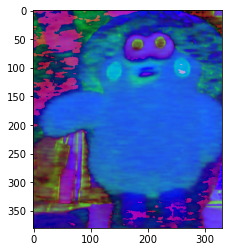

In [71]:
plt.imshow(hsv_roi)

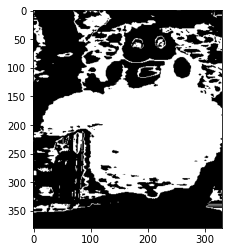

In [72]:
plt.imshow(chi_mask[50:430,170:500],cmap='gray')

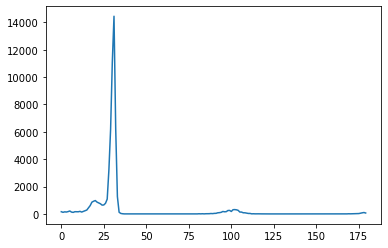

In [73]:
plt.plot(roi_hist)

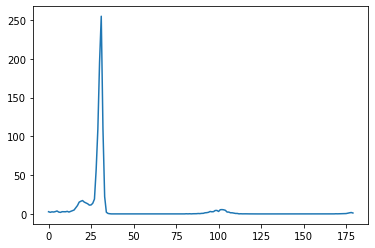

In [74]:
nor_roi_hist=cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
plt.plot(nor_roi_hist)

## MeanShift Object Tracking

In [75]:
# Setup the termination criteria, either 10 iteration or move by at least 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

#initial tracking window
x, y, w, h = 170, 200, 100,100 # simply hardcoded the values
track_window = (x, y, w, h)

cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    
    hsv_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    # Calculate the Back Projection based off the roi_hist created earlier
    dst=cv2.calcBackProject([hsv_frame],[0],nor_roi_hist,[0,180],1)
    
    ret,track_window=cv2.meanShift(dst,track_window,term_crit)
    
    x,y,w,h=track_window
    img=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),5)
    
    cv2.imshow('img',img)
    cv2.imshow('mask',dst)
    k=cv2.waitKey(10)&0xFF
    if k ==27:
        break
        
cv2.destroyAllWindows()
cap.release()

## CamShift Object Tracking

ret,track_window in meanshift format:


ret: 3

track_window: (212, 104, 243, 243)

ret,track_window in camshift format:


ret: ((363.0, 274.0), (315.5054931640625, 479.87384033203125), 5.310363292694092)

track_window: (205, 68, 316, 412)

In [ ]:
# Setup the termination criteria, either 10 iteration or move by at least 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

#initial tracking window
x, y, w, h = 170, 200, 100,100 # simply hardcoded the values
track_window = (x, y, w, h)

cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    
    hsv_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    # Calculate the Back Projection based off the roi_hist created earlier
    dst=cv2.calcBackProject([hsv_frame],[0],nor_roi_hist,[0,180],1)
    
    ret,track_window=cv2.CamShift(dst,track_window,term_crit)
    
    # camshift will be use ret instead of track_window
    x,y,w,h=track_window
    img=cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),5)
    
    cv2.imshow('img',img)
    cv2.imshow('mask',dst)
    k=cv2.waitKey(10)&0xFF
    if k ==27:
        break
        
cv2.destroyAllWindows()
cap.release()